<a href="https://colab.research.google.com/github/AliKhodarahmy/machinelearning2023/blob/main/Finalproject/third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import data**

In [1]:
#https://drive.google.com/file/d/1peAb1oNexs50eXbeWJ0_AVk25VskKw2L/view?usp=drive_link
!pip install --upgrade --no-cache-dir gdown
!gdown 1peAb1oNexs50eXbeWJ0_AVk25VskKw2L

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1peAb1oNexs50eXbeWJ0_AVk25VskKw2L
To: /content/Health index.csv
100% 24.4k/24.4k [00:00<00:00, 34.3MB/s]


# **Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

# **Load data**

In [26]:
data = pd.read_csv('/content/Health index.csv')
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4


In [51]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Assuming 'data' is your DataFrame
# X contains the features, and y contains the target variable
X = data.drop('Health index', axis=1)
y = data['Health index']

def categorize_health_index(y):
    categories = []
    for value in y:
        if value >= 85:
            category = 1
        elif value >= 70:
            category = 2
        elif value >= 50:
            category = 3
        elif value >= 30:
            category = 4
        else:
            category = 5
        categories.append(category)
    return categories

y_categorized = categorize_health_index(y)
y = y_categorized

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the resampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert y_resampled to a NumPy array or Pandas Series
y_resampled = np.array(y_resampled)  # or pd.Series(y_resampled, name='Health index')

# Display the shape of the resampled target variable
print("Shape of upsampled target variable:", y_resampled.shape)

# Combine the resampled features and target variable into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Health index')], axis=1)

print("Shape of original dataset:", data.shape)
print("Shape of upsampled dataset:", df_resampled.shape)


Shape of upsampled target variable: (1425,)
Shape of original dataset: (470, 15)
Shape of upsampled dataset: (1425, 15)


In [52]:
correlation_matrix = df_resampled.corr()['Health index'].sort_values(ascending=False)
correlation_matrix

Health index           1.000000
Water content          0.374049
Nitrogen               0.205471
CO                     0.091871
CO2                    0.071363
Oxigen                 0.036068
Power factor          -0.034338
Dielectric rigidity   -0.047644
Acethylene            -0.125744
DBDS                  -0.151012
Interfacial V         -0.224637
Ethylene              -0.290199
Ethane                -0.352239
Methane               -0.418598
Hydrogen              -0.433307
Name: Health index, dtype: float64

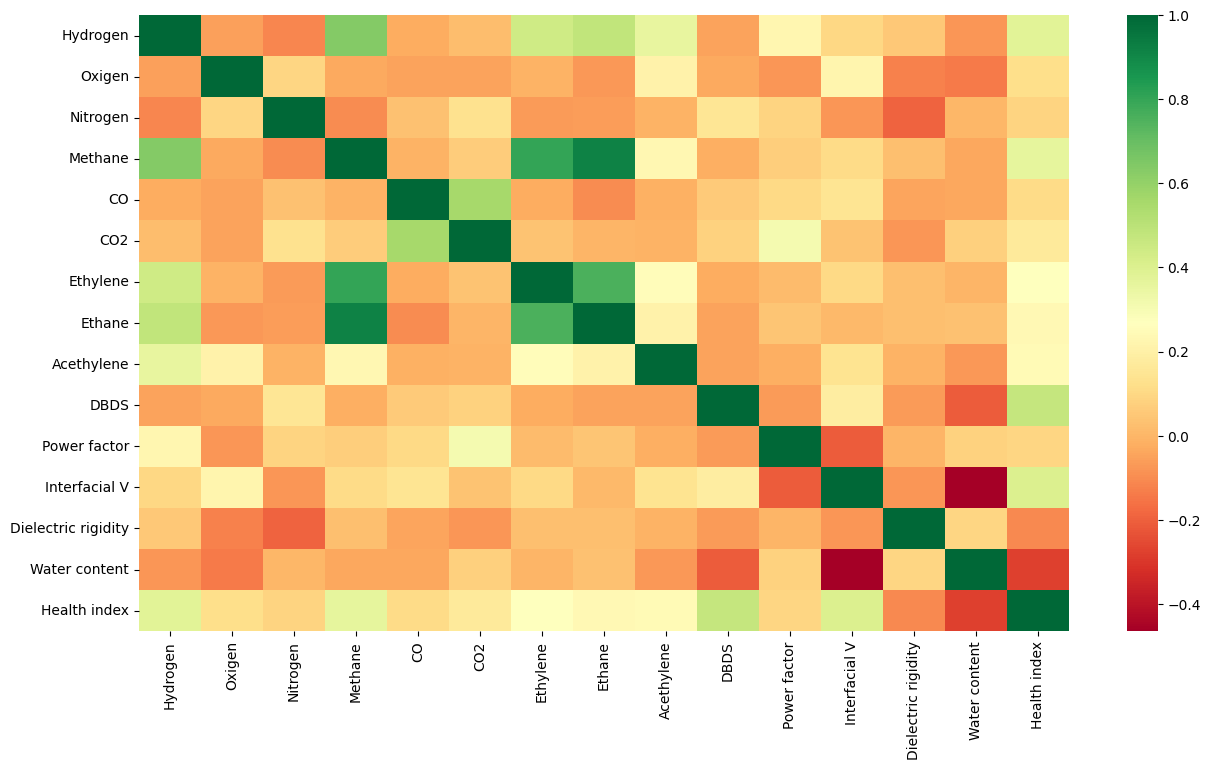

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a heatmap using seaborn
sns.heatmap(data.corr(), cmap="RdYlGn")

# Show the plot
plt.show()

# **MLPClassifier()**


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings

X = X_resampled
y = y_resampled

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)

In [ ]:
warnings.filterwarnings("ignore")

param_grid = {
    'hidden_layer_sizes': [(10,10), (10,20), (10,30),(20,10), (20,20), (20,20),(30,10), (30,10), (30,30)],  # Add more values if needed
    #'activation': ['logistic', 'relu','tanh'],  # Add more activation functions if needed
    'max_iter': [200, 300, 400, 500],  # Add more values if needed
    #'solver': ['adam', 'sgd', 'lbfgs'],  # Add more solvers if needed
    #'batch_size': [5, 10, 20],  # Add more batch sizes if needed
}

mlp = MLPClassifier(solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                    power_t=0.5, shuffle=True, random_state=7, tol=0.0001, verbose=False, warm_start=True,
                    momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                    beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Accuracy:", test_score)


Best Parameters: {'hidden_layer_sizes': (20, 20), 'max_iter': 400}
Test Accuracy: 0.7127659574468085


In [33]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(40,5), activation='tanh', solver='adam',
                      batch_size=20, learning_rate='constant', learning_rate_init=0.001,
                      max_iter=400,random_state=7)

model.fit(x_train, y_train)
model.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8140350877192982

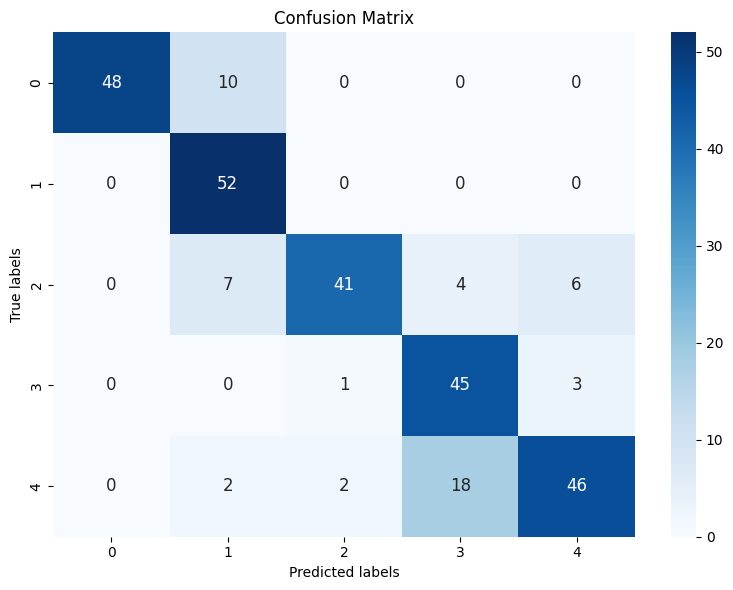

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        58
           2       0.73      1.00      0.85        52
           3       0.93      0.71      0.80        58
           4       0.67      0.92      0.78        49
           5       0.84      0.68      0.75        68

    accuracy                           0.81       285
   macro avg       0.83      0.83      0.82       285
weighted avg       0.84      0.81      0.81       285



In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# **LogisticRegression()**

In [36]:
X = X_resampled
y = y_resampled

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300],
}

# Create the Logistic Regression model
logistic_model = LogisticRegression()

# Create GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Accuracy:", test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'max_iter': 300, 'penalty': 'none'}
Test Accuracy: 0.743859649122807


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
model = LogisticRegression(solver='newton-cg',max_iter=300, random_state=7,penalty='none')
model.fit(x_train, y_train)
model.predict(x_test)
model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.7789473684210526

ValueError: penalty='none' is not supported for the liblinear solver

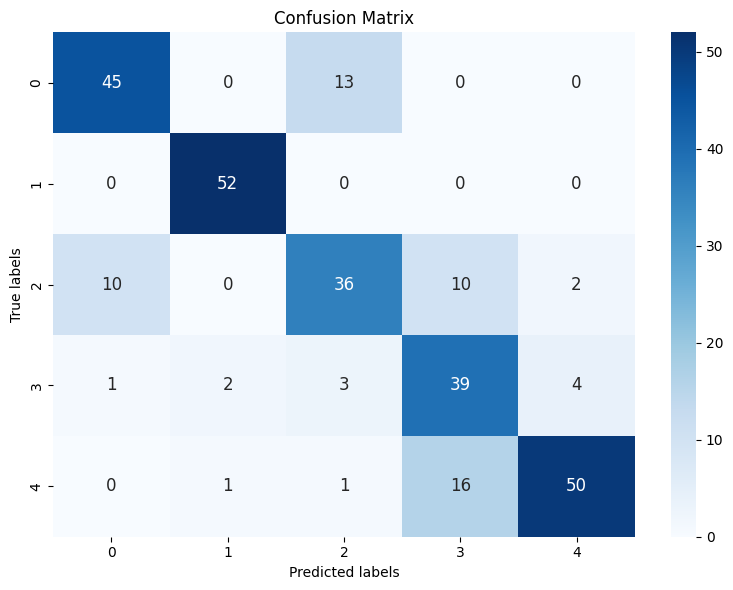

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.78      0.79        58
           2       0.95      1.00      0.97        52
           3       0.68      0.62      0.65        58
           4       0.60      0.80      0.68        49
           5       0.89      0.74      0.81        68

    accuracy                           0.78       285
   macro avg       0.78      0.79      0.78       285
weighted avg       0.79      0.78      0.78       285



In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = model.predict(x_test)

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# **این یک مجموعه داده مقطعی است. روش هایی که برای افزایش داده برای این داده ها وجود دارد عبارت است از:**

In [41]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [42]:
X = X_resampled
y = y_resampled

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,random_state=7)


In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

best_score = -np.inf
# Define the parameter grids
ccp_alpha_values = np.linspace(0, 0.2, num=100)
max_depth_values = range(1, 30)

for ccp_alpha in ccp_alpha_values:
    for max_depth in max_depth_values:
        reg = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=max_depth, random_state=7)
        reg.fit(x_train, y_train)
        score = reg.score(x_test, y_test)

        if score > best_score:
            best_score = score
            best_ccp_alpha = ccp_alpha
            best_max_depth = max_depth



In [54]:
print(best_ccp_alpha)
print(best_max_depth)

0.0
13


In [45]:
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, criterion='gini', max_depth=best_max_depth, random_state=7)
clf.fit(x_train, y_train)

y_hat = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.09%


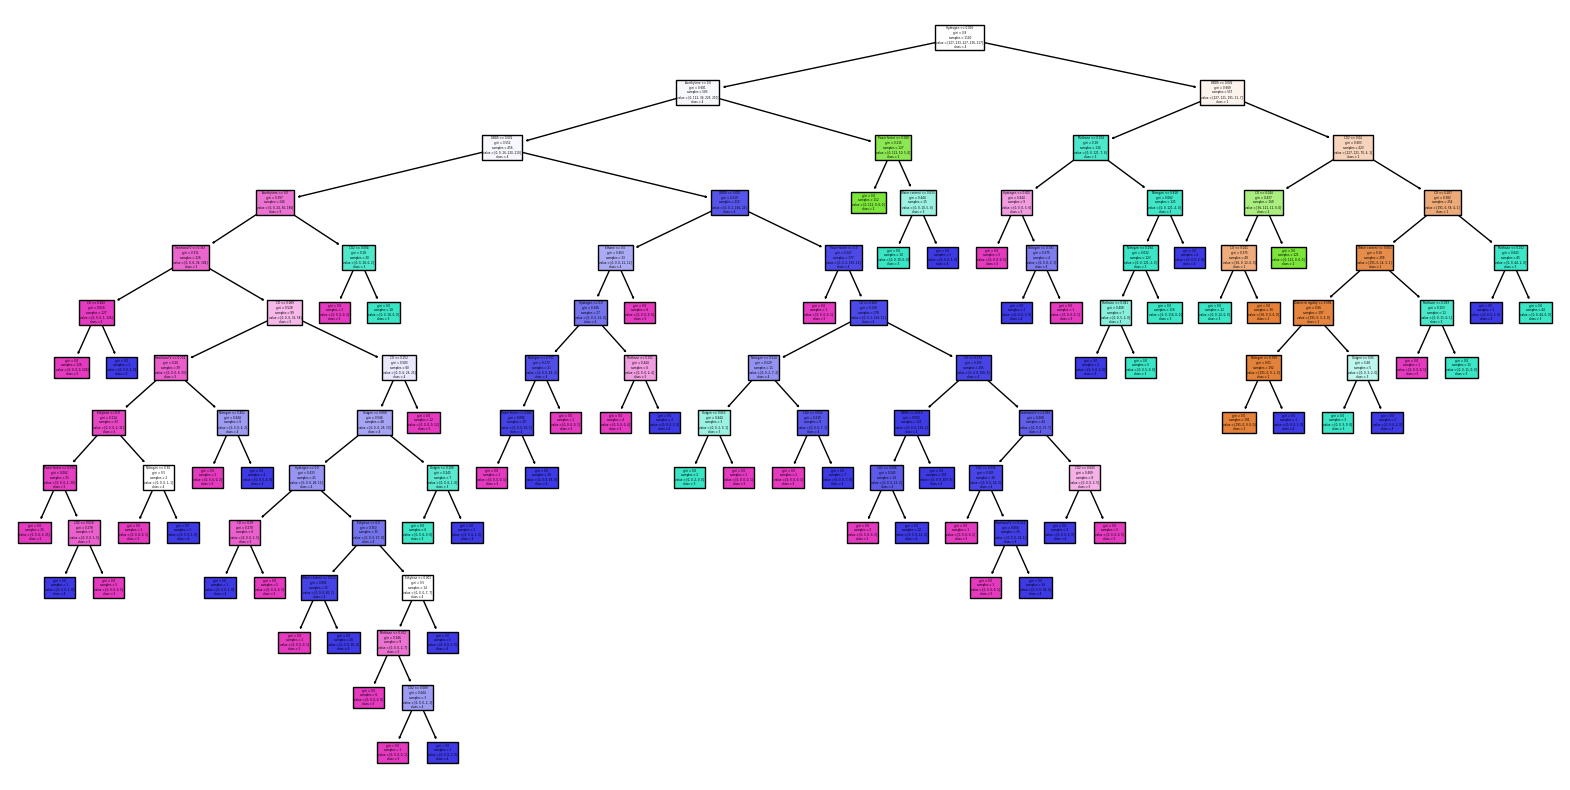

In [46]:
# Convert class names to strings
class_names = list(map(str, clf.classes_))
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

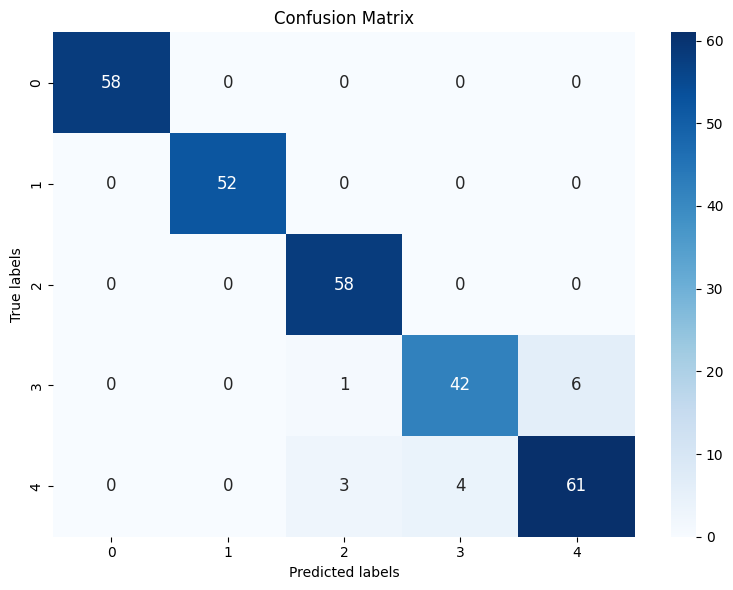

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        52
           3       0.94      1.00      0.97        58
           4       0.91      0.86      0.88        49
           5       0.91      0.90      0.90        68

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285



In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Making predictions on the test set
y_pred = y_hat

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))